In [1]:
import pickle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('train_X.pkl','rb') as f:
    train_X = pickle.load(f)
with open('train_y.pkl','rb') as f:
    train_y = pickle.load(f)
    
with open('cv_X.pkl','rb') as f:
    cv_X = pickle.load(f)
with open('cv_y.pkl','rb') as f:
    cv_y = pickle.load(f)

In [3]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=5, n_iter_no_change=5, random_state=1,
                                criterion='mse')
model

GradientBoostingRegressor(criterion='mse', max_depth=5, n_iter_no_change=5,
                          random_state=1)

# Feature Selection

In [4]:
column_index = []
column_dict = dict()
tr_fe_score,cv_fe_score = [], []

# Iterate till all columns
for j in tqdm.tqdm_notebook(range(train_X.shape[1])):
    max_cv_score = 1000 # Assign maximum value
    # Iterate over all columns
    for i in range(train_X.shape[1]):
        # select those which are not there in column_index
        if i not in column_index:
            # Fit the model with column
            model.fit(train_X[:,column_index + [i]],train_y)
            # Predict the train and cv
            tr_pred = model.predict(train_X[:,column_index + [i]])
            cv_pred = model.predict(cv_X[:,column_index + [i]])
            # score the error in train and cv
            tr_score = mean_squared_log_error(train_y,tr_pred)
            cv_score = mean_squared_log_error(cv_y,cv_pred)
            # If found improved one, then store the score and column index also
            if max_cv_score > cv_score:
                max_cv_score = cv_score
                current_column_index = i
    
    # Now update column index with best column index
    column_index = column_index + [current_column_index]
    # Fit, predict and score the train and cv with best column index
    model.fit(train_X[:,column_index],train_y)
    tr_pred = model.predict(train_X[:,column_index])
    cv_pred = model.predict(cv_X[:,column_index])
    tr_score = mean_squared_log_error(train_y,tr_pred)
    cv_score = mean_squared_log_error(cv_y,cv_pred)
    # Store the tr and cv score value into list so that we can plot the graph
    # between number of features and cv and train score
    tr_fe_score.append(tr_score)
    cv_fe_score.append(cv_score)
    # Store best column index as value and number of feature selected as key value
    column_dict[j+1] = column_index

<ipython-input-4-65f04be6dbb7>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm.tqdm_notebook(range(train_X.shape[1])):


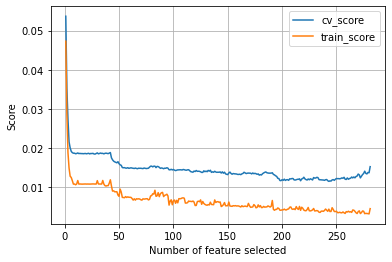

In [5]:
plt.plot(np.arange(1,train_X.shape[1]+1),cv_fe_score, label='cv_score')
plt.plot(np.arange(1,train_X.shape[1]+1),tr_fe_score, label='train_score')
plt.xlabel('Number of feature selected')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()

Observation: Somewhere around 50 to 100 we will find the best cv score among number of feature selected.

In [7]:
for i,s in enumerate(cv_fe_score[150:200]):
    print(i+150,s)

150 0.013563948634197324
151 0.013787420242134455
152 0.013436661850822984
153 0.013244734032139039
154 0.013416561381854753
155 0.01335404131554713
156 0.013338636961399739
157 0.013302297275789488
158 0.01320302009287171
159 0.013189081727941584
160 0.01324674111332925
161 0.013128424948457939
162 0.013332890279979918
163 0.013444958850533087
164 0.013741155702121977
165 0.013566898735491134
166 0.013407149662069295
167 0.013504736150153187
168 0.013531129829517808
169 0.013512685782174351
170 0.013501899208332103
171 0.013327661665185087
172 0.013554973862920091
173 0.013378239788054394
174 0.013468802995222214
175 0.013374262961886695
176 0.013222473107239577
177 0.013319029149095307
178 0.0130111795103976
179 0.013134106994036993
180 0.01305120161227533
181 0.013370890945597808
182 0.013563625944557187
183 0.013719251328370935
184 0.013827547091612208
185 0.013618918482695776
186 0.013550138631332668
187 0.013512612731646941
188 0.013530064580728854
189 0.013523284314287714
190 0.

Observation: It's 198 as number of feature to selected.

Now let see which 198 features need to be selected among 281 columns

In [8]:
column_dict[198]

[82,
 232,
 178,
 0,
 229,
 227,
 114,
 66,
 9,
 32,
 233,
 210,
 184,
 179,
 258,
 269,
 112,
 21,
 95,
 230,
 159,
 65,
 226,
 103,
 236,
 22,
 149,
 241,
 8,
 153,
 68,
 97,
 42,
 62,
 183,
 238,
 267,
 272,
 64,
 40,
 92,
 168,
 195,
 44,
 81,
 132,
 206,
 80,
 86,
 207,
 254,
 139,
 15,
 63,
 262,
 138,
 242,
 253,
 70,
 73,
 275,
 33,
 125,
 77,
 94,
 154,
 100,
 115,
 270,
 67,
 165,
 143,
 72,
 88,
 89,
 173,
 260,
 121,
 110,
 106,
 48,
 169,
 268,
 234,
 167,
 135,
 160,
 49,
 231,
 240,
 54,
 93,
 111,
 266,
 83,
 147,
 107,
 171,
 182,
 96,
 252,
 19,
 98,
 145,
 219,
 276,
 118,
 235,
 224,
 158,
 172,
 197,
 188,
 10,
 26,
 214,
 71,
 58,
 164,
 175,
 90,
 265,
 211,
 162,
 152,
 74,
 216,
 102,
 222,
 113,
 30,
 256,
 255,
 244,
 192,
 144,
 151,
 163,
 257,
 174,
 41,
 91,
 56,
 2,
 166,
 126,
 31,
 1,
 155,
 245,
 50,
 187,
 220,
 53,
 69,
 61,
 3,
 99,
 119,
 78,
 12,
 218,
 60,
 57,
 104,
 117,
 259,
 239,
 87,
 20,
 161,
 35,
 52,
 225,
 277,
 59,
 223,
 215,
 43,
 

In [9]:
with open('column_fe_dict_2.pkl','wb') as f:
    pickle.dump(column_dict,f)

In [10]:
model.fit(train_X[:,column_dict[198]],train_y)

GradientBoostingRegressor(criterion='mse', max_depth=5, n_iter_no_change=5,
                          random_state=1)

In [11]:
with open('gd_model_fe.pkl','wb') as f:
    pickle.dump(model,f)